# Árvores de Decisão - Random Forest - Crédito Bancário

Disponível em: https://mkmanu.wordpress.com/2014/08/28/modelling-credit-score-in-r-part-1/

Classe:
Credito: 0 - não concedido, 1 - concedido

Atributos:

duraçao_emprestimo: em meses

tempo_de_residencia: em anos

Quantidade_emprestimo: em Reais

Idade: em anos

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("credito.csv")
df = df.drop(df.columns[[0]], axis=1)
df.head()

,Credito,duracao_emprestimo,tempo_de_residencia,Quantidade_Emprestimo,idade
0,0,6,4,1169,67
1,1,48,2,5951,22
2,0,12,3,2096,49
3,0,42,4,7882,45
4,1,24,4,4870,53


In [3]:
print("tamanho do dataset: ",len(df))

tamanho do dataset:  1000


In [4]:
# Resumo estatístico
df.describe()

,Credito,duracao_emprestimo,tempo_de_residencia,Quantidade_Emprestimo,idade
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,2.845000,3271.258000,35.546000
std,0.458487,12.058814,1.103718,2822.736876,11.375469
min,0.000000,4.000000,1.000000,250.000000,19.000000
25%,0.000000,12.000000,2.000000,1365.500000,27.000000
50%,0.000000,18.000000,3.000000,2319.500000,33.000000
75%,1.000000,24.000000,4.000000,3972.250000,42.000000
max,1.000000,72.000000,4.000000,18424.000000,75.000000


In [5]:
# Correlação
df.corr()

,Credito,duracao_emprestimo,tempo_de_residencia,Quantidade_Emprestimo,idade
Credito,1.000000,0.214927,0.002967,0.154739,-0.091127
duracao_emprestimo,0.214927,1.000000,0.034067,0.624984,-0.036136
tempo_de_residencia,0.002967,0.034067,1.000000,0.028926,0.266419
Quantidade_Emprestimo,0.154739,0.624984,0.028926,1.000000,0.032716
idade,-0.091127,-0.036136,0.266419,0.032716,1.000000


In [6]:
df.corr()['Credito']

Credito                  1.000000
duracao_emprestimo       0.214927
tempo_de_residencia      0.002967
Quantidade_Emprestimo    0.154739
idade                   -0.091127
Name: Credito, dtype: float64

In [7]:
df.Credito.value_counts() # Credito: 0 - não concedido, 1 - concedido

0    700
1    300
Name: Credito, dtype: int64

## X e y

In [8]:
# Gera os dados de treino

X = df.loc[:,["duracao_emprestimo", "tempo_de_residencia", "Quantidade_Emprestimo", "idade"]]
y = df.loc[:,["Credito"]].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .3)

In [9]:
print(len(X_train))
print(len(X_test))

700
300


## Modelo

In [10]:
# Criação do modelo - Arvore de Decisao
clf = DecisionTreeClassifier()

In [11]:
print(clf)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [12]:
modelo = clf.fit(X_train, Y_train)
previsoes = modelo.predict(X_test)

In [13]:
print (confusion_matrix(Y_test, previsoes))

[[153  41]
 [ 72  34]]


In [14]:
print (accuracy_score(Y_test, previsoes))

0.6233333333333333


## colocar em escala

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std[:3]

array([[-0.23263793,  0.11998385, -0.03463802, -0.91771992],
       [ 0.26233639,  1.03290447,  1.08463529,  0.74314209],
       [ 1.25228503,  1.03290447, -0.02206976,  0.30607314]])

In [16]:
X_test_std[:3]

array([[ 0.26233639,  0.11998385,  0.52534775, -0.39323718],
       [-1.22258657, -1.70585737, -0.91790736, -0.56806476],
       [ 0.26233639, -0.79293676,  0.24710046, -0.74289234]])

In [17]:
modelo = clf.fit(X_train_std, Y_train)
previsoes = modelo.predict(X_test_std)
print (confusion_matrix(Y_test, previsoes))
print (accuracy_score(Y_test, previsoes))

[[156  38]
 [ 71  35]]
0.6366666666666667


## Utilizando o Random Forest Classifier

In [18]:
clf = RandomForestClassifier(n_estimators  = 1000)

Os 4 principais parâmetros em Modelos de Random Forest são:

n_estimators - quanto maior, melhor!

max depth - o padrão é 'none' e nesse caso árvores completas são criadas. Ajustando esse parâmetro pode ajudar a evitar overfitting.

max_features - diferentes valores devem ser testados, pois este parâmetro impacta na forma como os modelos RF distribuem os atributos pelas árvores.

criterion - define a forma como o algoritmo fará a divisão dos atributos e a classificação dos nós em cada árvore.

In [19]:
# Construção do modelo
modelo = clf.fit(X_train, Y_train.ravel())

In [20]:
modelo

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
#previsoes = modelo.predict(XTest)
# Create random forest classifier instance
predictions = modelo.predict(X_test)

In [22]:
#modelo.score(XTest, predictions)
accuracy_score(Y_test, predictions)

0.6466666666666666

In [23]:
print ("Train Accuracy :: ", accuracy_score(Y_train, modelo.predict(X_train)))
print ("Test Accuracy  :: ", accuracy_score(Y_test, predictions))
print (" Confusion matrix :: \n ", confusion_matrix(Y_test, predictions))

Train Accuracy ::  1.0
Test Accuracy  ::  0.6466666666666666
 Confusion matrix :: 
  [[172  22]
 [ 84  22]]


### previsao de uma instancia

In [24]:
instance = X_train[0:1]
instance

,duracao_emprestimo,tempo_de_residencia,Quantidade_Emprestimo,idade
342,18,3,3213,25


In [25]:
print(modelo.predict(instance))

[0]


In [26]:
print(modelo.predict_proba(instance))

[[0.806 0.194]]


#### x% de Negar crédito e y% de Aceitar Crédito

## Extraindo a Importância dos Atributos

In [27]:
# Extraindo a importância
atributos = ["duracao_emprestimo", "tempo_de_residencia", "Quantidade_Emprestimo", "idade"]
importances = modelo.feature_importances_
print(atributos)
importances

['duracao_emprestimo', 'tempo_de_residencia', 'Quantidade_Emprestimo', 'idade']


array([0.20404299, 0.09058209, 0.43590257, 0.26947235])

In [28]:
df = pd.DataFrame(data=[atributos, list(importances)])
df = df.T
df.columns = ['atributos', 'importância']
df = df.sort_values('importância', ascending=False)
df

,atributos,importância
2,Quantidade_Emprestimo,0.435903
3,idade,0.269472
0,duracao_emprestimo,0.204043
1,tempo_de_residencia,0.0905821


## plotar os atributos e suas importancias

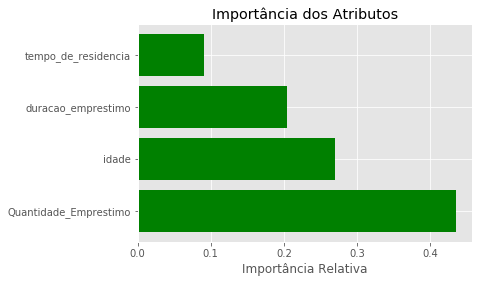

In [29]:
plt.figure(1)
plt.style.use('ggplot')
plt.yticks(np.arange(len(df)), df.atributos)
plt.title('Importância dos Atributos')
plt.barh(range(len(df)), df['importância'], color = 'g', align = 'center')
#plt.yticks(range(len(indices)),ind)
plt.xlabel('Importância Relativa')
plt.show()

# Métodos Ensemble

## Bagging 1

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [31]:
# Construção do Classificador
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples = 0.5, max_features = 0.5)

In [32]:
bagging

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

### cross_val_score - Evaluate a score by cross-validation

In [33]:
# Score do modelo
scores = cross_val_score(bagging, X, y.ravel())

In [34]:
# Média do score
mean = scores.mean()
mean

0.6990073906241571

In [35]:
print(scores)

[0.69161677 0.6966967  0.70870871]


## Bagging 2

In [36]:
# Construção do Classificador
bagging = BaggingClassifier(RandomForestClassifier(n_estimators  = 5000), max_samples = 0.5, max_features = 0.5)

In [37]:
bagging

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [38]:
# Score do modelo
scores = cross_val_score(bagging, X, y.ravel())

In [39]:
print(scores)

[0.69461078 0.69069069 0.6966967 ]


In [40]:
# Média do score
mean = scores.mean()
mean

0.693999388610167

## Extremely Randomized Trees (ExtraTrees)

In [41]:
from sklearn.ensemble import ExtraTreesClassifier

In [42]:
# Cria o classificador
clf = DecisionTreeClassifier(max_depth = None, min_samples_split = 2, random_state = 0)
scores = cross_val_score(clf, X, y)
mean = scores.mean()
print(scores)
print(mean)

[0.60179641 0.61561562 0.61561562]
0.61100921280562


In [43]:
clf = RandomForestClassifier(n_estimators = 10, max_depth = None, min_samples_split = 2, random_state = 0)
scores = cross_val_score(clf, X, y.ravel())
mean = scores.mean()
print(scores)
print(mean)

[0.67365269 0.64864865 0.66966967]
0.6639903376430323


In [44]:
clf = ExtraTreesClassifier(n_estimators = 10, max_depth = None, min_samples_split = 2, random_state = 0)
scores = cross_val_score(clf, X, y.ravel())
mean = scores.mean()
print(scores)
print(mean)

[0.66167665 0.65465465 0.68468468]
0.6670053286819755


## Adaboost

In [45]:
from sklearn.ensemble import AdaBoostClassifier

In [46]:
# Construindo o estimador base
estim_base = DecisionTreeClassifier(max_depth = 1, min_samples_leaf = 1)
estim_base.fit(X_train, Y_train)
print(estim_base.score(X_test, Y_test))
estim_base_err = 1.0 - estim_base.score(X_test, Y_test)
estim_base_err

0.6466666666666666


0.3533333333333334

In [56]:
ada_clf = AdaBoostClassifier(base_estimator = estim_base, 
                                  learning_rate = 0.1, 
                                  n_estimators = 400, 
                                  algorithm = "SAMME")

In [57]:
ada_clf.fit(X_train, Y_train.ravel())

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.1, n_estimators=400, random_state=None)

In [58]:
scores = cross_val_score(ada_clf, X_test, Y_test.ravel())
print(scores)
means = scores.mean()
print(means)

[0.63366337 0.68       0.65656566]
0.6567430076340968


# Gradiente Boosting Classifier

Gradient Boosting = Gradient Descent + Boosting. 

Basicamente 3 etapas são realizadas na construção do modelo:

1- Gera um regressor

2- Computa o erro residual

3- Aprende a prever o resíduo



Parâmetros mais importantes:

Número de árvores de regressão (n_estimators)

Profundidade de cara árvore (max_depth)

loss function (loss)

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

# Cria o classificador
est = GradientBoostingClassifier(n_estimators = 600, max_depth = 3)

# Cria o modelo
est.fit(X_train, Y_train.ravel())

# Previsões das classes (labels)
pred = est.predict(X_test)

# Score nos dados de teste (Acurácia)
acc = est.score(X_test, Y_test.ravel())
print('Acurácia: %.4f' % acc)

# Previsão das probabilidades das classes
est.predict_proba(X_test)[0]

Acurácia: 0.6267


array([0.94250019, 0.05749981])

## XGBoost - Algoritmo Ensemble Mais Eficiente

### Regularização (controla a complexidade, Reduz o Overfitting) ###
### Objective Function : Training Loss + Regularization ###
### Usa processamento paralelo (Roda no Spark) ###

### Instalar no prompt de comando
conda install -c conda-forge xgboost

In [60]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [61]:
model = XGBClassifier()
model.fit(X_train, Y_train.ravel())
# make predictions for test data
y_pred = model.predict(X_test)

In [62]:
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 63.33%


## XGBoost - Exemplo 2

In [63]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [64]:
# load data
dataset = pd.read_csv('pima-indians-diabetes.csv')
dataset.columns = [ "preg", "glucose", "Diastolic", "Triceps", "insulin", "BDI", "ped_func", "Age", "Class"]
dataset.head()

,preg,glucose,Diastolic,Triceps,insulin,BDI,ped_func,Age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [65]:
len(dataset)

767

In [66]:
# split data into X and y
X = dataset.iloc[:,0:8]
Y = dataset.iloc[:,8]

In [67]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [68]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("XGBoost")
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBoost
Accuracy: 76.38%


In [69]:
# Bagging
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples = 0.5, max_features = 0.5)

In [70]:
# Score do modelo
scores = cross_val_score(bagging, X, Y.ravel())

In [71]:
print("Bagging")
means = scores.mean()
print("Accuracy: %.2f%%" % (means * 100.0))

Bagging
Accuracy: 73.28%
